# Linear Regression for Maintenance

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Importing the dataset

In [2]:
datasetTemp = pd.read_csv('../csv/maintenance.csv')
XTemp = datasetTemp['quarter'].values.reshape(-1, 1)
yTemp = datasetTemp['maintenance(million)'].values.reshape(-1, 1)

datasetTariff = pd.read_csv('../csv/tariff.csv')
XTariff = datasetTemp['maintenance(million)'].values.reshape(-1, 1)
yTariff = datasetTariff['tariff_per_kwh'].values.reshape(-1, 1)

## Splitting the dataset into the Training set and Test set

In [3]:
X_trainTemp, X_testTemp, y_trainTemp, y_testTemp = train_test_split(XTemp, yTemp, test_size = 0.2, random_state = 0)
X_trainTariff, X_testTariff, y_trainTariff, y_testTariff = train_test_split(XTariff, yTariff, test_size = 0.2, random_state = 0)

## Training the Simple Linear Regression model on the Training set

In [4]:
regressorTemp = LinearRegression()
regressorTemp.fit(X_trainTemp, y_trainTemp)
regressorTariff = LinearRegression()
regressorTariff.fit(X_trainTariff, y_trainTariff)

LinearRegression()

## Predict Maintenance


In [5]:
#Predict Maintenance
#To retrieve the intercept:
print("y intercept: " + str(regressorTemp.intercept_))
#For retrieving the slope:
print("slope: " + str(regressorTemp.coef_))

# y = a+bx
# test data and see how accurately our algorithm predicts the percentage score.
y_predTemp = regressorTemp.predict(X_testTemp)

# mae, msq, rmse
print('Mean Absolute Error:', metrics.mean_absolute_error(y_testTemp, y_predTemp))
print('Mean Squared Error:', metrics.mean_squared_error(y_testTemp, y_predTemp))
print('Root Mean Squared Error:',
      np.sqrt(metrics.mean_squared_error(y_testTemp, y_predTemp)))

y = regressorTemp.intercept_ + (regressorTemp.coef_* 2022.1)
print("Predicted Maintenance: 2022 Quarter 1: " + str(y))

y intercept: [-2045.98627215]
slope: [[1.02576413]]
Mean Absolute Error: 1.62527657687078
Mean Squared Error: 3.774834009677237
Root Mean Squared Error: 1.9428932059372788
Predicted Maintenance: 2022 Quarter 1: [[28.21136736]]


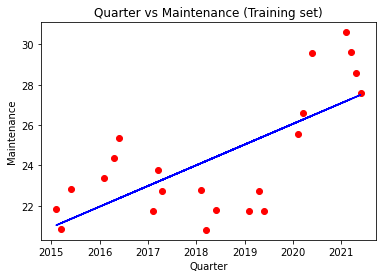

In [6]:
# show training set
plt.scatter(X_trainTemp, y_trainTemp, color='red')
plt.plot(X_trainTemp, regressorTemp.predict(X_trainTemp), color='blue')
plt.title('Quarter vs Maintenance (Training set)')
plt.xlabel('Quarter')
plt.ylabel('Maintenance')
plt.show()

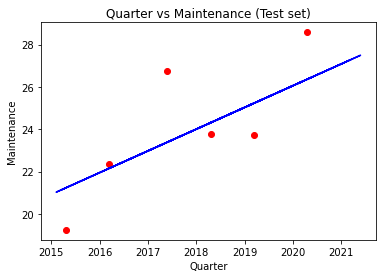

In [7]:
# show test set
plt.scatter(X_testTemp, y_testTemp, color='red')
plt.plot(X_trainTemp, regressorTemp.predict(X_trainTemp), color='blue')
plt.title('Quarter vs Maintenance (Test set)')
plt.xlabel('Quarter')
plt.ylabel('Maintenance')
plt.show()

## Predict Tariff

In [8]:
#To retrieve the intercept:
print("y intercept: " + str(regressorTariff.intercept_))
#For retrieving the slope:
print("slope: " + str(regressorTariff.coef_))

# y = a+bx
# test data and see how accurately our algorithm predicts the percentage score.
y_predTariff = regressorTariff.predict(X_testTariff)

# mae, msq, rmse
print('Mean Absolute Error:', metrics.mean_absolute_error(y_testTariff, y_predTariff))
print('Mean Squared Error:', metrics.mean_squared_error(y_testTariff, y_predTariff))
print('Root Mean Squared Error:',
      np.sqrt(metrics.mean_squared_error(y_testTariff, y_predTariff)))

y = regressorTariff.intercept_ + (regressorTariff.coef_* y)
print("Predicted Tariff: 2022 Quarter 1: " + str(y))

y intercept: [22.5002365]
slope: [[-0.02538984]]
Mean Absolute Error: 1.8322930925677892
Mean Squared Error: 4.860180930162901
Root Mean Squared Error: 2.2045818039172196
Predicted Tariff: 2022 Quarter 1: [[21.78395444]]


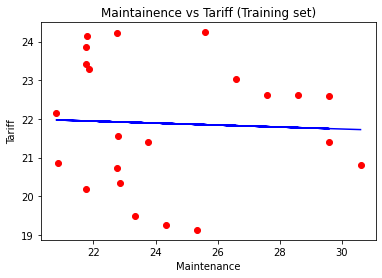

In [9]:
# show training set
plt.scatter(X_trainTariff, y_trainTariff, color='red')
plt.plot(X_trainTariff, regressorTariff.predict(X_trainTariff), color='blue')
plt.title('Maintainence vs Tariff (Training set)')
plt.xlabel('Maintenance')
plt.ylabel('Tariff')
plt.show()

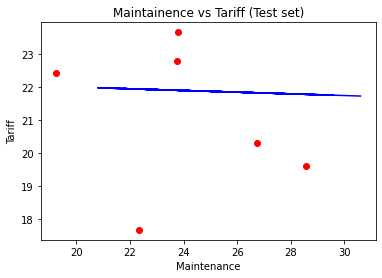

In [10]:
# # show test set
plt.scatter(X_testTariff, y_testTariff, color='red')
plt.plot(X_trainTariff, regressorTariff.predict(X_trainTariff), color='blue')
plt.title('Maintainence vs Tariff (Test set)')
plt.xlabel('Maintenance')
plt.ylabel('Tariff')
plt.show()
